In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [71]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
small_board_ndarray = np.array(small_board_list)
ndarray_2x2_board = small_board_ndarray.reshape((2,2))
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(ndarray_2x2_board))

Arrange wheat on a plate of 4 squares (ndarray)：[[1 2]
 [4 8]]


# Problem 2

In [72]:
def cal_wheat(n, m):
    result = 0
    for i in range(n * m):
        result = result + 2**i
    return result
print("The number of wheat on an 8x8 square is", cal_wheat(8, 8))

The number of wheat on an 8x8 square is 18446744073709551615


# Problem 3

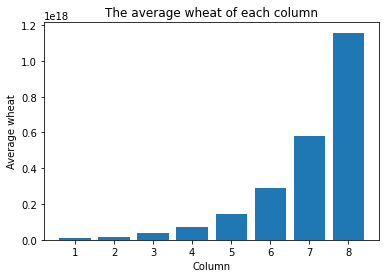

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.

In [73]:
%matplotlib inline
def problem_3(n, m):
    wheatOnEachSquare = np.zeros((n, m))
    temp = 0
    for idx, _ in np.ndenumerate(wheatOnEachSquare):
        wheatOnEachSquare[idx] = 2**(temp)
        temp = temp + 1
    averageOfEachColumn = np.sum(wheatOnEachSquare, axis = 0) / n
    plt.xlabel("Column")
    plt.ylabel("Average wheat")
    plt.title("The average wheat of each column")
    plt.bar(np.arange(1,9), averageOfEachColumn)
    plt.show()
    return wheatOnEachSquare
problem_3(8, 8)

# Problem 4

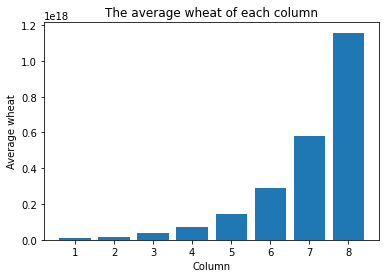

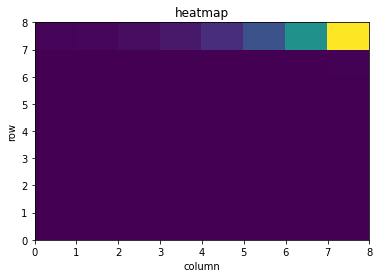

In [74]:
wheatOnEachSquare = problem_3(8, 8)
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(wheatOnEachSquare)
plt.show()

# Problem 5

In [75]:
wheatOnEachHalf = np.sum(wheatOnEachSquare.reshape((2, 32)), axis = 1)
print("Total wheat on first half:", wheatOnEachHalf[0])
print("Total wheat on second half:", wheatOnEachHalf[1])
print("Second half is", wheatOnEachHalf[1] / wheatOnEachHalf[0], "times greater than first half")

Total wheat on first half: 4294967295.0
Total wheat on second half: 1.8446744069414584e+19
Second half is 4294967296.0 times greater than first half


# Problem 6

In [76]:
# First method (list method)
def list_method():
    board_list = [1]
    for _ in range(64 - 1):
        board_list.append(2*board_list[-1])
    board_ndarray = np.array(board_list)
# Second method (append method)
def append_method():
    board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(64 - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
# Third method (broadcast method)
def broadcast_method():
    indices_of_squares = np.arange(64).astype(np.uint64)
    board_ndarray = 2**indices_of_squares

# Problem 7

In [77]:
%%timeit
list_method()

11.5 µs ± 88 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [78]:
%%timeit
append_method()

352 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
%%timeit
broadcast_method()

2.85 µs ± 50.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


>We can clearly see that in respect to speed, the broadcast method reign supreme, the list method comes in $2^{nd}$ and the append method is the slowest.<br>
A reason for this is the code in the broadcast method is shorter with no <b>for</b> loop and the method itself saves more memory usage then other methods. The list method comes in $2^{nd}$ because native Python list is known for it's fast append speed and numpy append is just inferior.